<a href="https://colab.research.google.com/github/alyxxxv/Data-Analyst-Portfolio/blob/main/Segmentasi_Customer_Pada_Marketing_Menggunakan_Clustering_dengan_Algoritma_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelling Clustering - Marketing Department**

---



# **Data Understanding**

In [ ]:
#Import library
import numpy as np # linear algebra
import math as m #import matematika 
import pandas as pd # data processing, read CSV file, 
import matplotlib.pyplot as plt #untuk visualisasi data
import seaborn as sns #untuk visualisasi data 
import warnings
from pprint import pprint
from IPython.core.display import HTML,display
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data csv/data fp rg/marketing_allstatus.csv') #load the data
df

,id,country,traffic_source,age,gender,status,num_of_item,product_id,sale_price,total_pembelian
0,64718,Australia,Search,12,F,Shipped,1,10804,13.000000,13.000000
1,65015,Australia,Search,23,F,Shipped,1,9007,21.000000,21.000000
2,3154,Australia,Organic,60,F,Shipped,1,9331,10.000000,10.000000
3,93297,Australia,Search,65,F,Shipped,3,6290,32.990002,98.970005
4,3744,Australia,Display,44,M,Cancelled,2,20707,45.000000,90.000000
...,...,...,...,...,...,...,...,...,...,...
366582,62069,United States,Search,68,F,Complete,1,11804,26.990000,26.990000
366583,99987,United States,Search,52,F,Returned,3,1823,41.990002,125.970005
366584,64087,United States,Search,39,F,Shipped,1,5639,26.990000,26.990000
366585,64158,United States,Organic,40,M,Shipped,4,27039,26.990000,107.959999


In [ ]:
df.head()

,id,country,traffic_source,age,gender,status,num_of_item,product_id,sale_price,total_pembelian
0,64718,Australia,Search,12,F,Shipped,1,10804,13.000000,13.000000
1,65015,Australia,Search,23,F,Shipped,1,9007,21.000000,21.000000
2,3154,Australia,Organic,60,F,Shipped,1,9331,10.000000,10.000000
3,93297,Australia,Search,65,F,Shipped,3,6290,32.990002,98.970005
4,3744,Australia,Display,44,M,Cancelled,2,20707,45.000000,90.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366587 entries, 0 to 366586
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               366587 non-null  int64  
 1   country          366587 non-null  object 
 2   traffic_source   366587 non-null  object 
 3   age              366587 non-null  int64  
 4   gender           366587 non-null  object 
 5   status           366587 non-null  object 
 6   num_of_item      366587 non-null  int64  
 7   product_id       366587 non-null  int64  
 8   sale_price       366587 non-null  float64
 9   total_pembelian  366587 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 28.0+ MB


In [ ]:
df.isna().sum()

id                 0
country            0
traffic_source     0
age                0
gender             0
status             0
num_of_item        0
product_id         0
sale_price         0
total_pembelian    0
dtype: int64

In [ ]:
df.describe()

,id,age,num_of_item,product_id,sale_price,total_pembelian
count,366587.000000,366587.000000,366587.000000,366587.000000,366587.000000,366587.000000
mean,50243.649442,41.049399,1.668914,15295.775041,59.791273,99.813191
std,28804.272566,17.023641,0.963205,8410.328155,65.691712,138.649256
min,1.000000,12.000000,1.000000,1.000000,0.020000,0.020000
25%,25445.000000,26.000000,1.000000,8044.000000,24.900000,29.990000
50%,50380.000000,41.000000,1.000000,16050.000000,39.990002,58.000000
75%,75230.500000,56.000000,2.000000,22561.000000,69.949997,118.000000
max,100000.000000,70.000000,4.000000,29120.000000,999.000000,3996.000000


Dari data yang telah digunakan, didapatkan bahwa tidak ada missing value dari data yang telah didapatkan. Sehingga, bisa lanjut ke step berikutnya yaitu Check outlier menggunakan boxplot. 

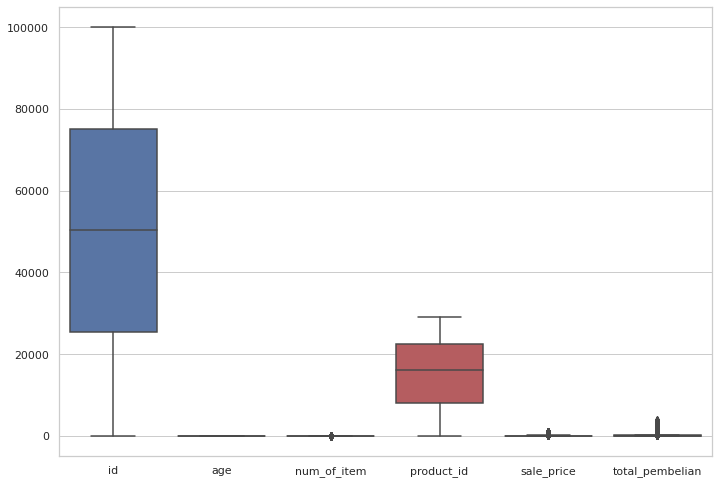

In [ ]:
#check apakah ada data yang outlier dengan visualisasi data 
def show_bloxpot(df):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_theme(style="whitegrid")
    sns.boxplot(data=df)

show_bloxpot(df)

In [ ]:
#Untuk mengetahui data kategorikal dan data numerikal dari data marketing. 
from pprint import pprint
numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("Categorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['id', 'age', 'num_of_item', 'product_id', 'sale_price', 'total_pembelian']
Categorical features:
['country', 'traffic_source', 'gender', 'status']


In [ ]:
# Dari masing-masing unique values, kita akan coba melihat frequency tiap value di tiap kolom
for feature in categorical_features:
    print(df[feature].value_counts())
    print ('------')

China             125438
United States      80844
Brasil             53240
South Korea        19513
United Kingdom     17474
France             17380
Germany            15481
Spain              15106
Australia           8397
Japan               8323
Belgium             4505
Poland               727
Colombia             119
España                27
Austria               13
Name: country, dtype: int64
------
Search      256649
Organic      54876
Facebook     22763
Email        18082
Display      14217
Name: traffic_source, dtype: int64
------
M    184083
F    182504
Name: gender, dtype: int64
------
Shipped       110088
Complete       92022
Processing     74054
Cancelled      54629
Returned       35794
Name: status, dtype: int64
------


# **DATA PREPARATION**

**VISUALISASI DATA**

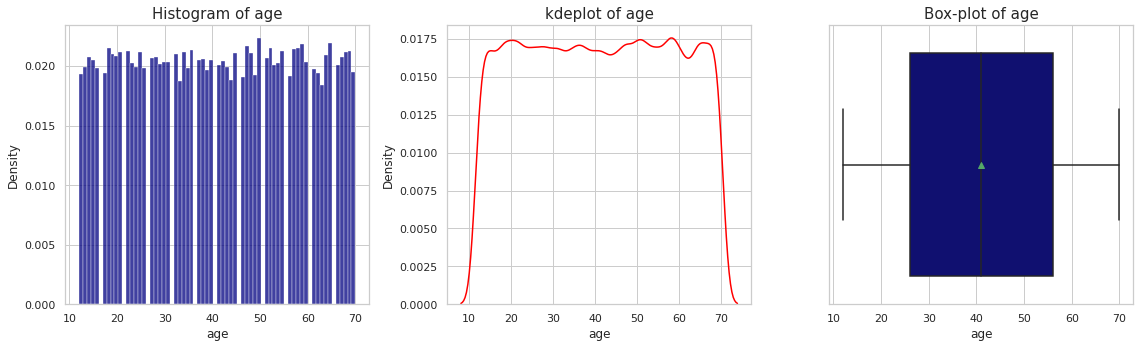

In [ ]:
imp_numerical_cols=['age']
for i,col in enumerate(imp_numerical_cols):
    text="<center><h3><b  style='color:black'>" + f"Distribution of</b> <b style='color:#800080'> {col}"+ "</b></h3><hr></center>"
    display(HTML(text))
    plt.figure(figsize=(16,5))
    bins='auto'
    plt.subplot(1,3,1)
    sns.histplot(data=df,x=col,stat='density',bins=bins,color='navy')
    plt.title(f'Histogram of {col}',size=15)
    
    plt.subplot(1,3,2)
    sns.kdeplot(data=df,x=col,color='red')
    plt.title(f'kdeplot of {col}',size=15)
    
    plt.subplot(1,3,3)
    sns.boxplot(data=df,x=col,color='navy',showmeans=True)
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

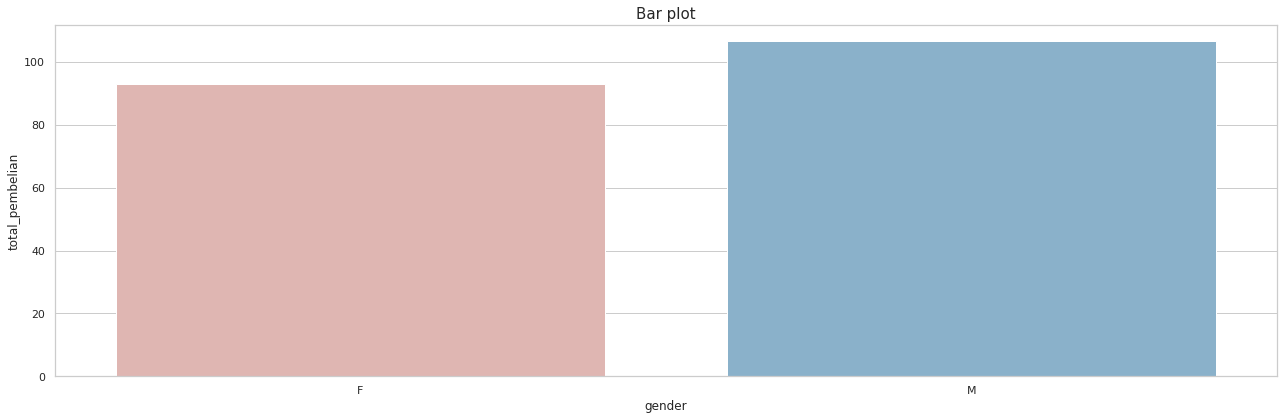

In [ ]:
fig=plt.figure(figsize=(18,6))
text="<center><h3><b  style='color:black'>" + f"Visualisasi data dari </b> <b style='color:#800080'> Jenis Kelamin dengan Total Pembelian "+ "</b></h3><hr></center>"
display(HTML(text))
ax=plt.subplot(1,1,1)
temp=df.groupby('gender')['total_pembelian'].mean().reset_index()
sns.barplot(data=temp,x='gender',y='total_pembelian',palette=['#E6B0AA','#7FB3D5']);
plt.title("Bar plot",fontsize=15)

plt.tight_layout()

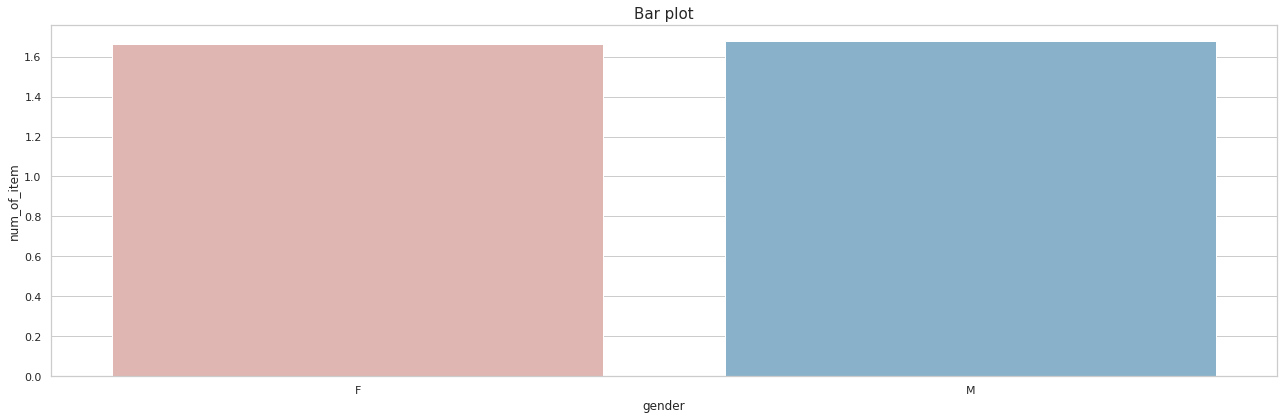

In [ ]:
fig=plt.figure(figsize=(18,6))
text="<center><h3><b  style='color:black'>" + f"Visualisasi data dari </b> <b style='color:#800080'> Jenis Kelamin dengan num_of_item "+ "</b></h3><hr></center>"
display(HTML(text))
ax=plt.subplot(1,1,1)
temp=df.groupby('gender')['num_of_item'].mean().reset_index()
sns.barplot(data=temp,x='gender',y='num_of_item',palette=['#E6B0AA','#7FB3D5']);
plt.title("Bar plot",fontsize=15)

plt.tight_layout()

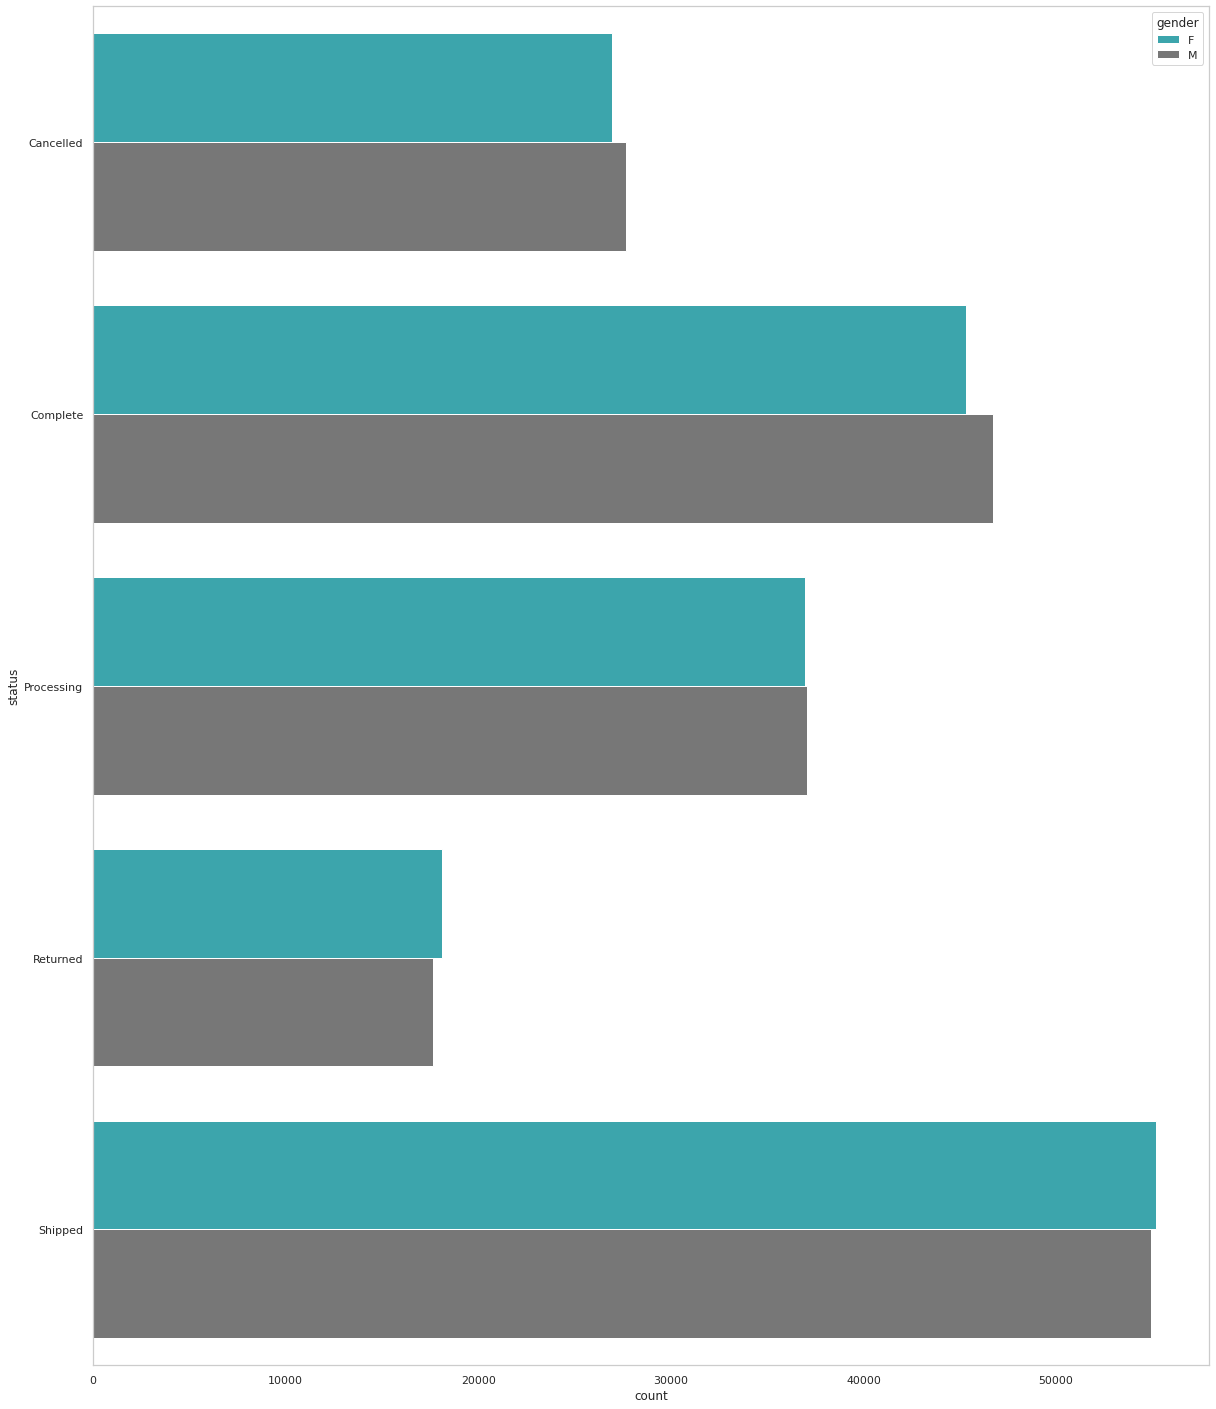

In [ ]:
plt.figure(figsize=(20, 25))
sns.countplot(
    y="status",
    data=df,
    hue="gender",
    order=sorted(df.status.unique()),
    palette=["#29B5BF"] + ["#777777"]
)
plt.grid(False)
plt.show()

MENGUBAH DATA KATEGORIKAL KE DATA NUMERIKAL 

Untuk melakukan segmentasi, maka harus menggunakan data kategorikal. Dalam menggunakan data kategorikal tersebut perlu diconvert kedalam data numerikal menggunakan "One Hot Encoder". 

In [ ]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['country'])

# printing label
label

array([ 0,  0,  0, ..., 14, 14, 14])

Keterangan: 

0 : Australia

1 : Austria 

2 : Belgium 

3 : Brasil 

4 : China 

5 : Colombia 

6 : Espana 

7 : France 

8 : Germany 

9 : Japan 

10 : Poland 

11 : South Korea

12 : Spain 

13 : UK 

14 : US

In [ ]:
label2 = le.fit_transform(df['status'])
label2

array([4, 4, 4, ..., 4, 4, 3])

Keterangan:

0 : Cancelled

1 : Completed 

2 : Processing 

3 : Returned 

4 : Shipping

In [ ]:
label3 = le.fit_transform(df['traffic_source'])
label3

array([4, 4, 3, ..., 4, 3, 2])

Ket 🇰

0 : Display 

1 : Email 

2 : Facebook 

3 : Organic 

4 : Search 

In [ ]:
label4 = le.fit_transform(df['gender'])
label4

array([0, 0, 0, ..., 0, 1, 0])

Ket 

0 : Female 

1 : Male

In [ ]:
df.drop("country", axis=1, inplace=True)
df["country"] = label
df

,id,traffic_source,age,gender,status,num_of_item,product_id,sale_price,total_pembelian,country
0,64718,Search,12,F,Shipped,1,10804,13.000000,13.000000,0
1,65015,Search,23,F,Shipped,1,9007,21.000000,21.000000,0
2,3154,Organic,60,F,Shipped,1,9331,10.000000,10.000000,0
3,93297,Search,65,F,Shipped,3,6290,32.990002,98.970005,0
4,3744,Display,44,M,Cancelled,2,20707,45.000000,90.000000,0
...,...,...,...,...,...,...,...,...,...,...
366582,62069,Search,68,F,Complete,1,11804,26.990000,26.990000,14
366583,99987,Search,52,F,Returned,3,1823,41.990002,125.970005,14
366584,64087,Search,39,F,Shipped,1,5639,26.990000,26.990000,14
366585,64158,Organic,40,M,Shipped,4,27039,26.990000,107.959999,14


In [ ]:
df.drop("status", axis=1, inplace=True)
df["status"] = label2
df

,id,traffic_source,age,gender,num_of_item,product_id,sale_price,total_pembelian,country,status
0,64718,Search,12,F,1,10804,13.000000,13.000000,0,4
1,65015,Search,23,F,1,9007,21.000000,21.000000,0,4
2,3154,Organic,60,F,1,9331,10.000000,10.000000,0,4
3,93297,Search,65,F,3,6290,32.990002,98.970005,0,4
4,3744,Display,44,M,2,20707,45.000000,90.000000,0,0
...,...,...,...,...,...,...,...,...,...,...
366582,62069,Search,68,F,1,11804,26.990000,26.990000,14,1
366583,99987,Search,52,F,3,1823,41.990002,125.970005,14,3
366584,64087,Search,39,F,1,5639,26.990000,26.990000,14,4
366585,64158,Organic,40,M,4,27039,26.990000,107.959999,14,4


In [ ]:
df.drop("traffic_source", axis=1, inplace=True)
df["traffic_source"] = label3
df

,id,age,gender,num_of_item,product_id,sale_price,total_pembelian,country,status,traffic_source
0,64718,12,F,1,10804,13.000000,13.000000,0,4,4
1,65015,23,F,1,9007,21.000000,21.000000,0,4,4
2,3154,60,F,1,9331,10.000000,10.000000,0,4,3
3,93297,65,F,3,6290,32.990002,98.970005,0,4,4
4,3744,44,M,2,20707,45.000000,90.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...
366582,62069,68,F,1,11804,26.990000,26.990000,14,1,4
366583,99987,52,F,3,1823,41.990002,125.970005,14,3,4
366584,64087,39,F,1,5639,26.990000,26.990000,14,4,4
366585,64158,40,M,4,27039,26.990000,107.959999,14,4,3


In [ ]:
df.drop("gender", axis=1, inplace=True)
df["gender"] = label4
df

,id,age,num_of_item,product_id,sale_price,total_pembelian,country,status,traffic_source,gender
0,64718,12,1,10804,13.000000,13.000000,0,4,4,0
1,65015,23,1,9007,21.000000,21.000000,0,4,4,0
2,3154,60,1,9331,10.000000,10.000000,0,4,3,0
3,93297,65,3,6290,32.990002,98.970005,0,4,4,0
4,3744,44,2,20707,45.000000,90.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
366582,62069,68,1,11804,26.990000,26.990000,14,1,4,0
366583,99987,52,3,1823,41.990002,125.970005,14,3,4,0
366584,64087,39,1,5639,26.990000,26.990000,14,4,4,0
366585,64158,40,4,27039,26.990000,107.959999,14,4,3,1


In [ ]:
num_columns = ['id','age','num_of_item', 'product_id', 'sale_price', 'total_pembelian']
cat_columns = ['country', 'status', 'traffic_source', 'gender']

df[cat_columns] = df[cat_columns].astype('str')

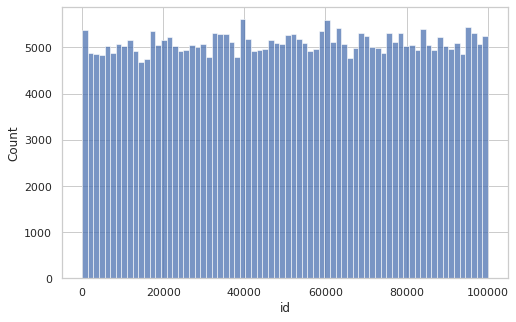

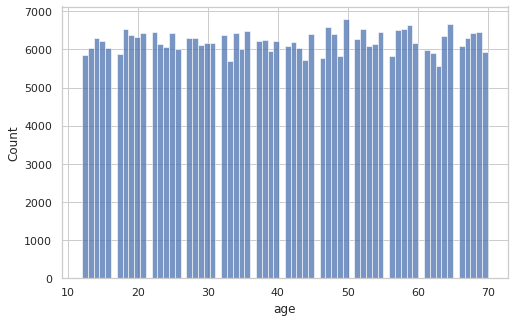

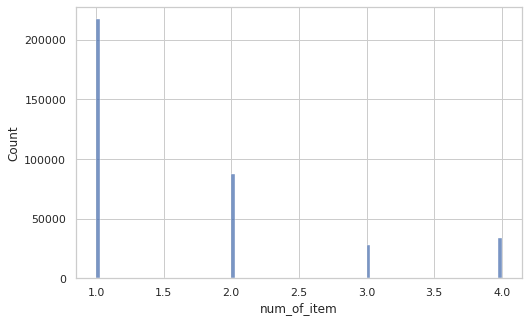

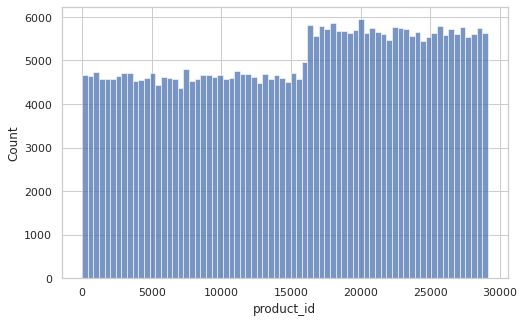

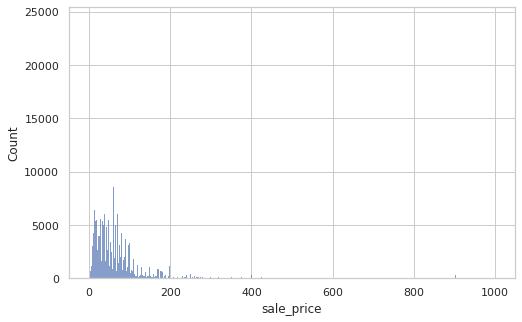

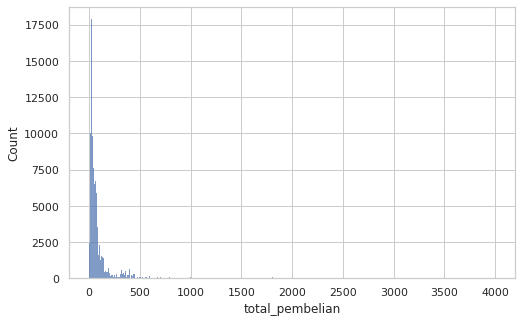

In [ ]:
for numerical in num_columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x=numerical)
    plt.savefig(numerical + '.png')

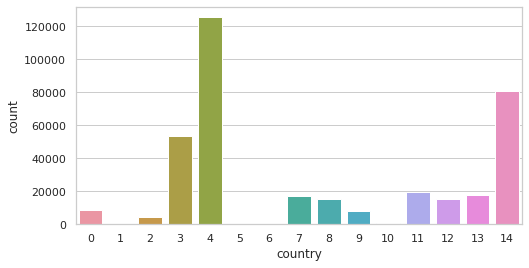

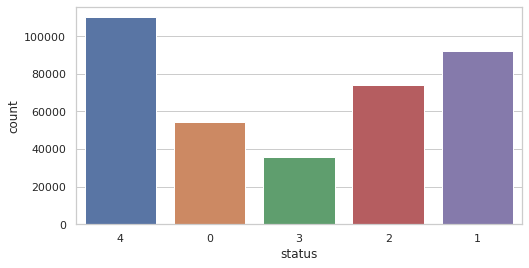

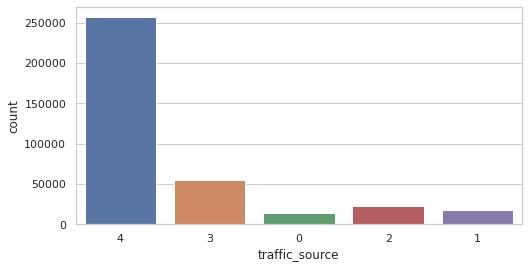

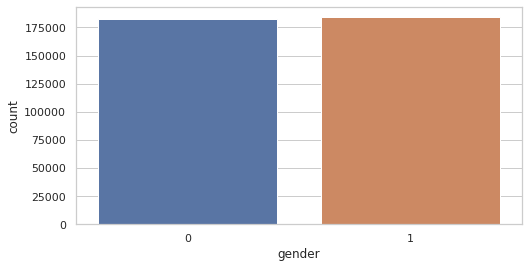

In [ ]:
for category in cat_columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=category)

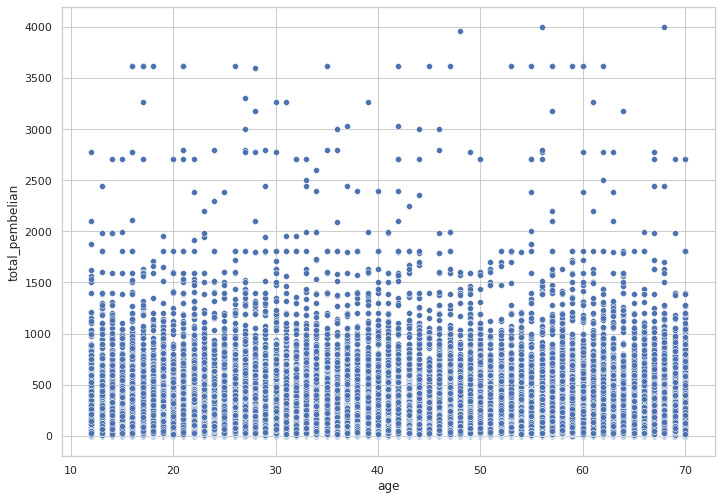

In [ ]:
sns.scatterplot(x='age', y='total_pembelian', data=df)

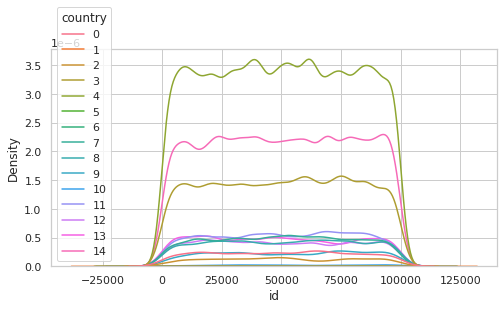

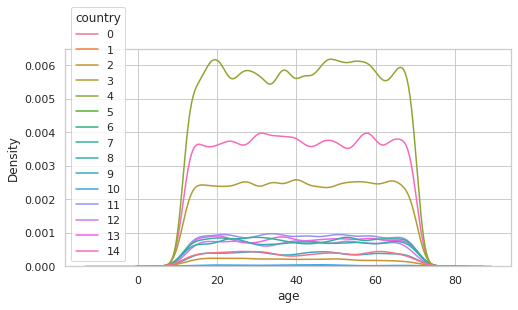

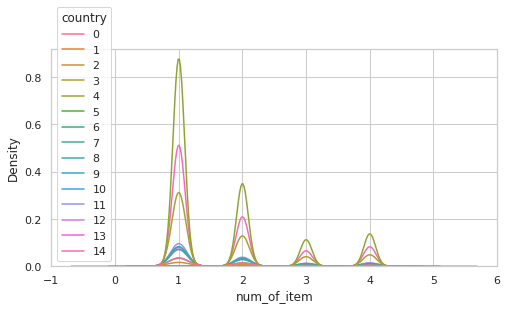

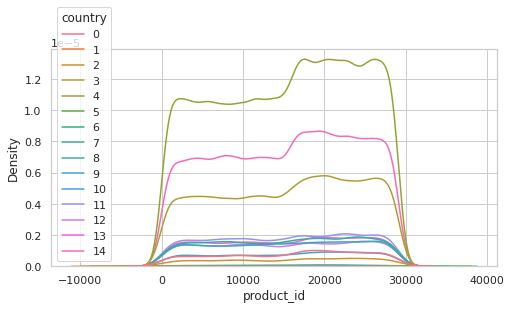

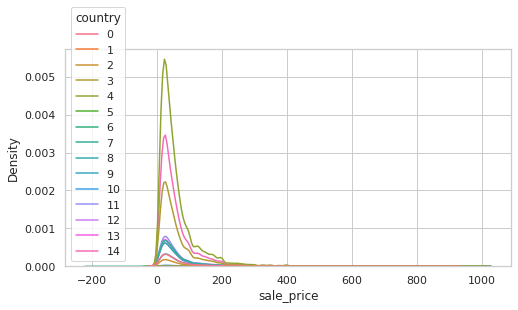

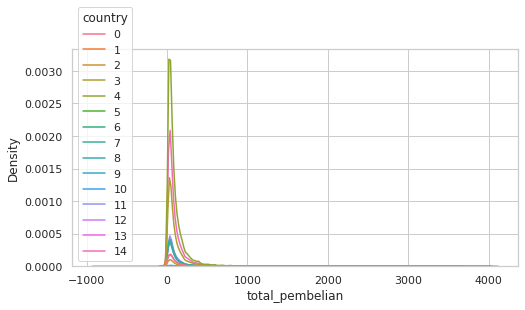

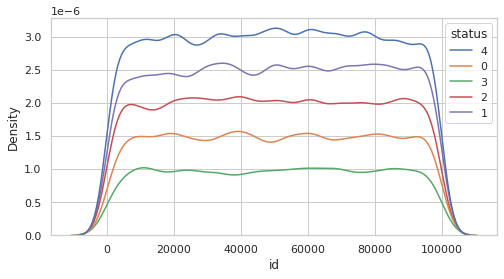

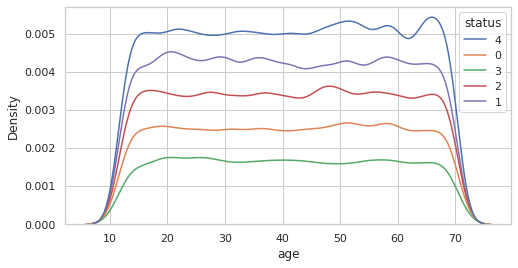

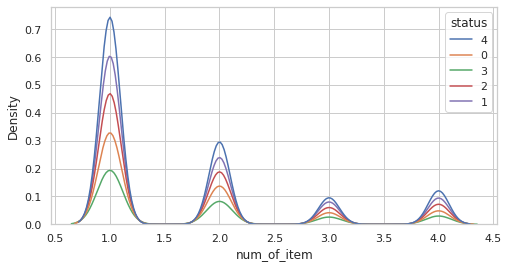

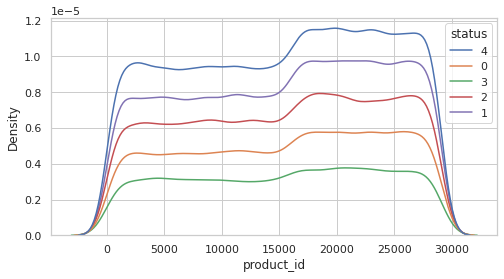

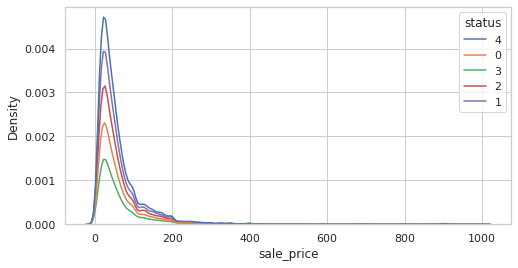

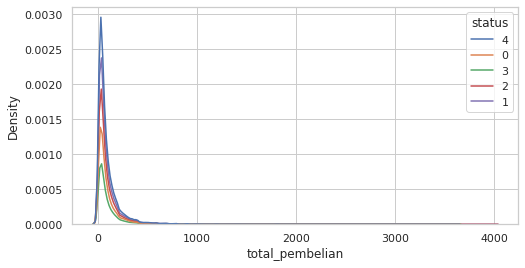

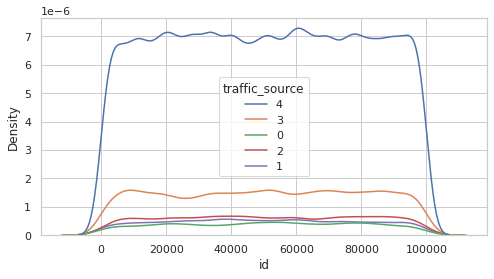

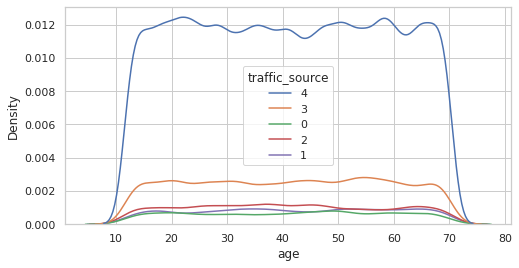

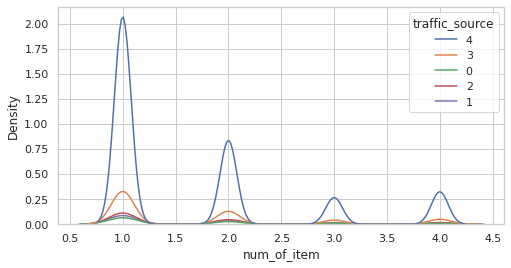

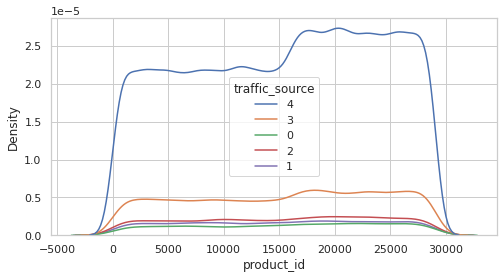

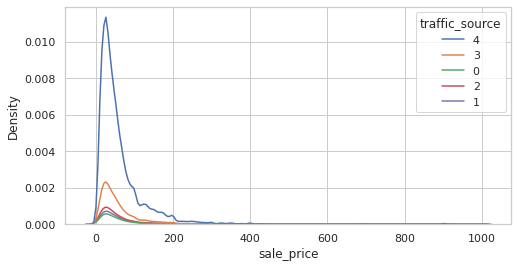

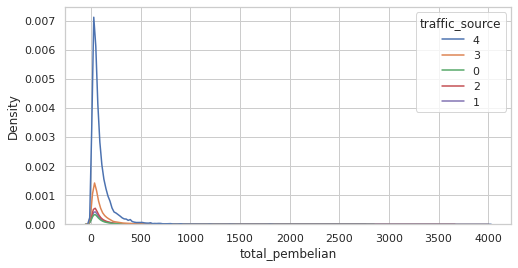

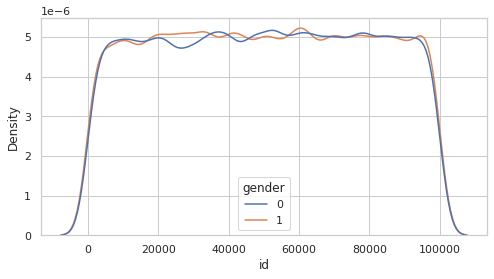

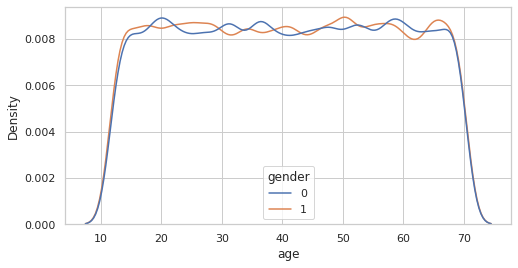

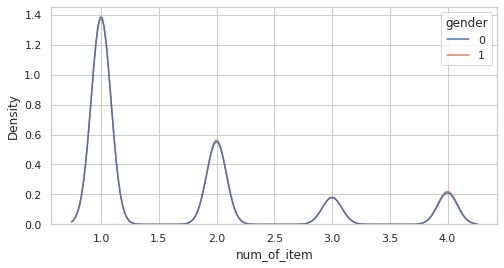

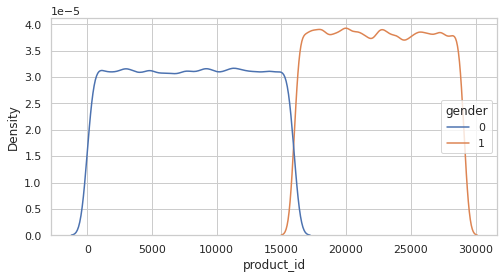

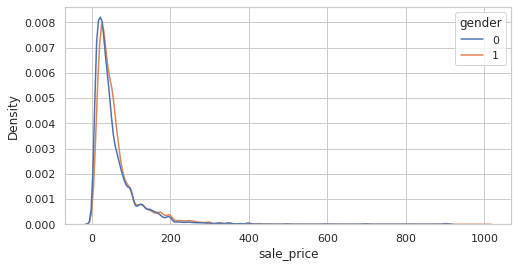

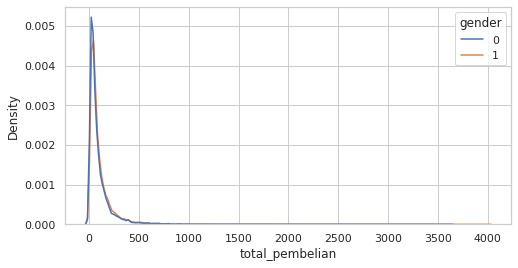

In [ ]:
for category in cat_columns:
    for numerical in num_columns:
        if numerical != 'ID':
            plt.figure(figsize=(8,4))
            sns.kdeplot(data=df, x=numerical, hue=category) ## Non-normalized version of this plot by switching kdeplot for histplot

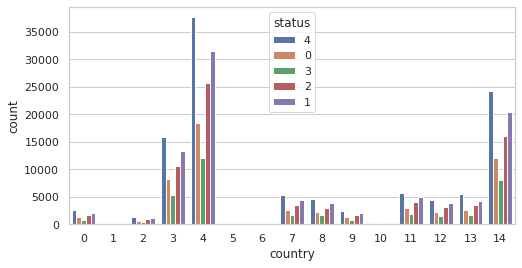

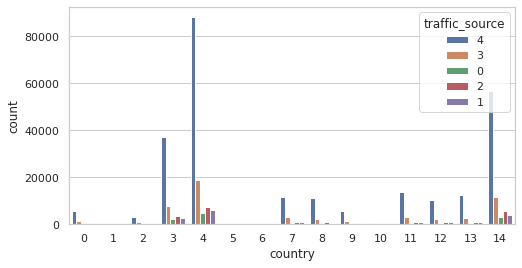

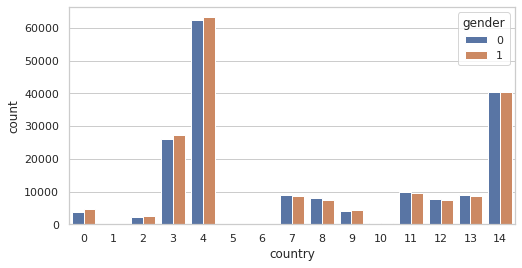

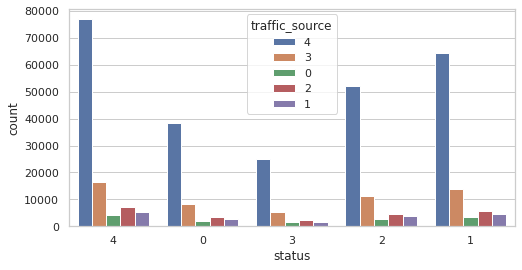

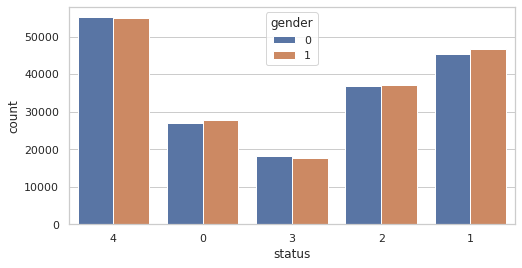

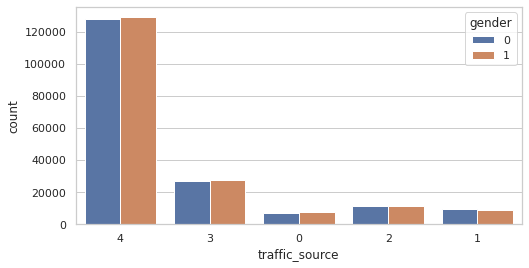

In [ ]:
cat_aux = cat_columns.copy()
for category1 in cat_columns:
    cat_aux.pop(0);
    for category2 in cat_aux:
        if category1 != category2:
            plt.figure(figsize=(8,4))
            sns.countplot(data=df, x=category1, hue=category2)

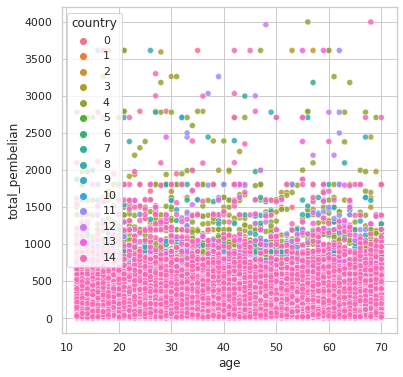

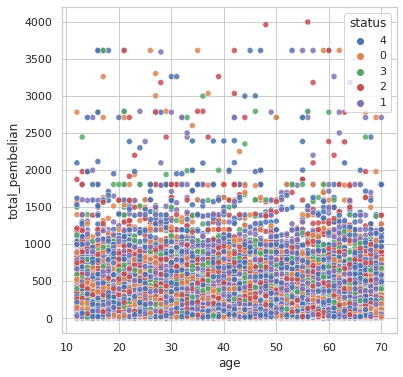

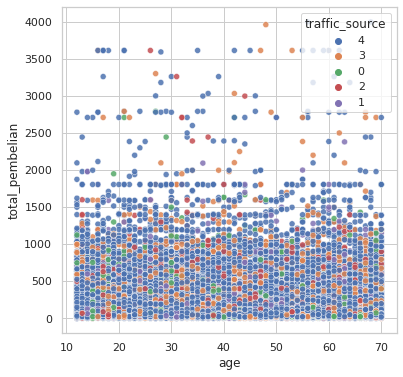

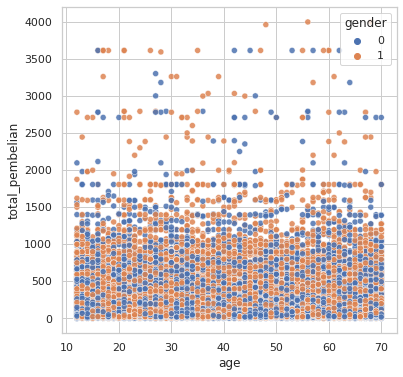

In [ ]:
def bivariate_scatter(x, y, hue, df):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=x, y=y, data=df, hue=hue, alpha=0.85)
for cat in cat_columns:
    bivariate_scatter('age', 'total_pembelian', cat, df)

# **MODELLING**

pada tahap modelling ini, kita akan menggunakan segmentasi marketing menggunakan Clustering. Hal ini sesuai dengan business understanding yang mana menginginkan untuk melakukan segmentasi pelanggan berdasarkan sifat (jumlah barang yang dibeli, kecenderungan membeli barang seperti apa, umur, dll.) Clustering merupakan pengelompokan suatu kelompok berdasarkan kemiripan sifat, karakter, dsb. Pada clustering ini, akan dikelompokkan sifat customer berdasarkan usia, negara, jumlah barang yang dibeli, status, traffic_source, dan total pembelian dari customer. 

**Elbow Method**

elbow method ini berguna untuk menentukan nilai K yang optimal. Nilai K yang optimal ini ditentukan dari titik elbow. 

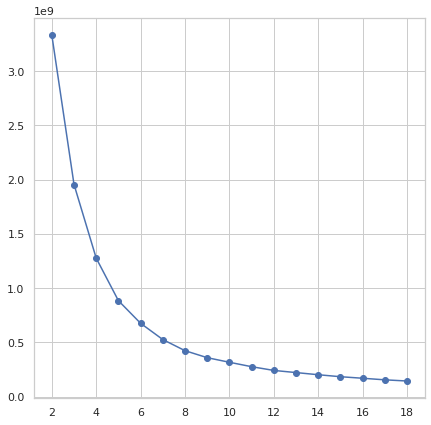

In [ ]:
X = df[['age', 'country', 'num_of_item', 'gender', 'total_pembelian', 'status', 'traffic_source']].values #nilai X atau pendefinisian variabel. 

clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

dari grafik elbow tersebut, maka didapatkan nilai clusternya adalah 5. Selanjutnya, dilakukan pendefinisian untuk nilai cluster sebanyak 5. 

Membuat Clustering Menggunakan K-Means denan nilai cluster sebanyak 5. 

In [ ]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [ ]:
kmeans=KMeans(n_clusters=5, random_state=0).fit(X)

In [ ]:
labels = kmeans.labels_
X_pca_df['Labels'] = labels

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

Pada kali ini, kita perlu memilih variabel mana yang digunakan untuk pengelompokan customer. Kita menggunakan semua variabel dan membuang kolom "Id". 

In [ ]:
results_df = df.drop(['id'], axis=1)
results_df['Labels'] = kmeans.labels_
results_df = results_df.astype({'country':'int32', 'status':'int32', 'traffic_source':'int32', 'gender':'int32', 'num_of_item':'int32', 'total_pembelian':'int32', 'age':'int32', 'product_id':'int32', 'sale_price':'int32'})
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366587 entries, 0 to 366586
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   age              366587 non-null  int32
 1   num_of_item      366587 non-null  int32
 2   product_id       366587 non-null  int32
 3   sale_price       366587 non-null  int32
 4   total_pembelian  366587 non-null  int32
 5   country          366587 non-null  int32
 6   status           366587 non-null  int32
 7   traffic_source   366587 non-null  int32
 8   gender           366587 non-null  int32
 9   Labels           366587 non-null  int32
dtypes: int32(10)
memory usage: 14.0 MB


**MENGINTERPRETASIKAN HASIL CLUSTER**

In [ ]:
summary = {}

for index in range(6):
    summary[index] = results_df[results_df['Labels'] == index].describe().T  # .describe method provides general statistics about the data

**CLUSTER 0**

In [ ]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
age,249510.0,41.031442,17.047940,12.0,26.0,41.0,56.0,70.0
num_of_item,249510.0,1.380570,0.714331,1.0,1.0,1.0,2.0,4.0
product_id,249510.0,15343.172787,8482.518967,1.0,8475.0,15622.5,23043.0,29120.0
sale_price,249510.0,33.702004,20.315706,0.0,18.0,29.0,45.0,94.0
total_pembelian,249510.0,41.998016,22.787819,0.0,24.0,39.0,59.0,94.0
country,249510.0,7.512773,4.593535,0.0,4.0,4.0,13.0,14.0
status,249510.0,2.145261,1.456867,0.0,1.0,2.0,4.0,4.0
traffic_source,249510.0,3.421061,1.063534,0.0,3.0,4.0,4.0,4.0
gender,249510.0,0.486081,0.499807,0.0,0.0,0.0,1.0,1.0
Labels,249510.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


**Cluster 0** :  Adalah kelompok yang mana kebanyakan ingin membeli/memesan barang sebanyak 1 barang saja. mayoritas pada cluster 0 adalah perempuan (0). Untuk umur pada cluster 0 hampir sama, namun sedikit pada umur 40-an. Pada cluster 0, pelanggan cenderung membeli barang dengan harga 20-30. Dikarenakan pelanggan pada cluster ini hanya membeli barang sebanyak 1 dengan harga 20-an, sehingga total pembelian dari cluster 0 sebagian besar berada 20-an dengan jumlah > 40000. 

---

Dilihat dari rentang sale_price yang dibeli serta product_id yang paling banyak dibeli pada 25000-30000, maka cluster ini cenderung tertarik untuk membeli barang dengan category "*Socks, Underwear, Sleep & Lounge, Swim, dan Accesories*"


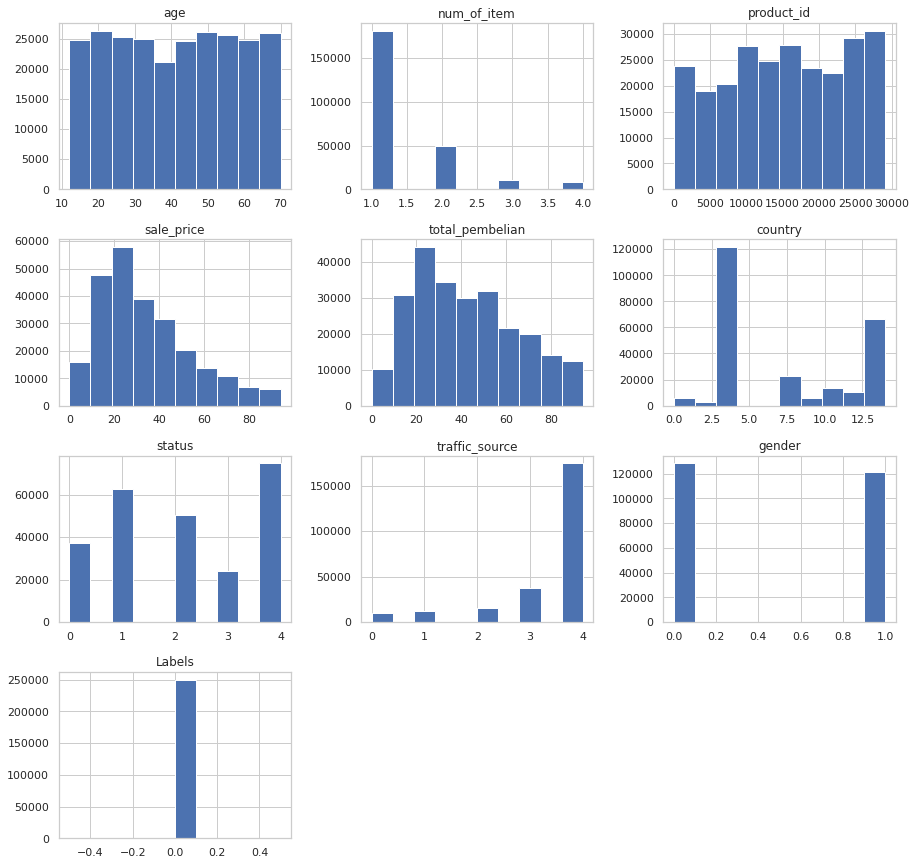

In [ ]:
#Plot cluster 0
results_df[results_df['Labels'] == 0].hist(figsize=(15,15));

**CLUSTER 1**

In [ ]:
summary[1]

,count,mean,std,min,25%,50%,75%,max
age,23913.0,41.112993,17.040061,12.0,26.0,41.0,56.0,70.0
num_of_item,23913.0,2.635763,1.080978,1.0,2.0,2.0,4.0,4.0
product_id,23913.0,15075.256011,8102.424786,2.0,7824.0,17815.0,21370.0,29120.0
sale_price,23913.0,158.499728,85.144246,61.0,97.0,134.0,189.0,528.0
total_pembelian,23913.0,342.308911,77.674155,244.0,278.0,320.0,394.0,541.0
country,23913.0,7.516163,4.613889,0.0,4.0,4.0,13.0,14.0
status,23913.0,2.139297,1.458512,0.0,1.0,2.0,4.0,4.0
traffic_source,23913.0,3.427884,1.064888,0.0,3.0,4.0,4.0,4.0
gender,23913.0,0.538159,0.498552,0.0,0.0,1.0,1.0,1.0
Labels,23913.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


**Cluster 1** :  Adalah kelompok yang mana kebanyakan ingin membeli/memesan barang sebanyak 2 barang saja. mayoritas pada cluster 1 adalah laki-laki (1). Untuk umur pada cluster 1 hampir sama, namun sedikit pada umur 40-an. Pada cluster 1, pelanggan cenderung membeli barang dengan harga 100-200. Dikarenakan pelanggan pada cluster ini hanya membeli barang sebanyak 2 dengan harga 100-200, sehingga total pembelian dari cluster 1 sebagian besar berada 250-300-an dengan jumlah > 5000. 

---

Dilihat dari rentang sale_price yang dibeli serta product_id yang paling banyak dibeli pada 20000-25000, maka cluster ini cenderung tertarik untuk membeli barang dengan category "*Suits & Sport Coats, Jeans, Pants, Shorts, Outwear&Coats*"

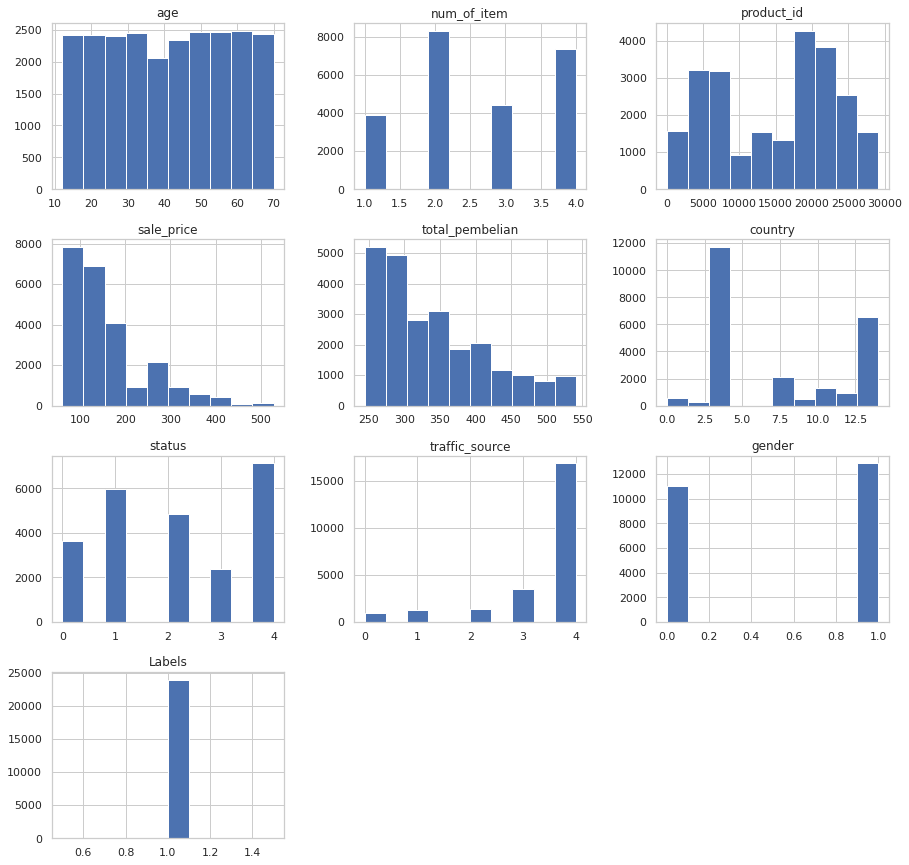

In [ ]:
#Plot hasil cluster 1
results_df[results_df['Labels'] == 1].hist(figsize=(15,15));

**CLUSTER 2**

In [ ]:
summary[2]

,count,mean,std,min,25%,50%,75%,max
age,540.0,40.120370,16.557830,12.0,27.0,40.0,55.0,70.0
num_of_item,540.0,3.262963,0.893866,2.0,2.0,4.0,4.0,4.0
product_id,540.0,15745.903704,8304.422503,785.0,8390.0,19650.5,23838.0,26901.0
sale_price,540.0,608.535185,229.134025,325.0,380.0,598.5,817.5,999.0
total_pembelian,540.0,1840.144444,600.918581,1300.0,1408.0,1599.0,1922.0,3996.0
country,540.0,7.711111,4.627283,0.0,4.0,4.0,13.0,14.0
status,540.0,2.257407,1.462722,0.0,1.0,2.0,4.0,4.0
traffic_source,540.0,3.450000,1.054762,0.0,3.0,4.0,4.0,4.0
gender,540.0,0.581481,0.493774,0.0,0.0,1.0,1.0,1.0
Labels,540.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0


**Cluster 2** :  Adalah kelompok yang mana kebanyakan ingin membeli/memesan barang sebanyak 4 barang. mayoritas pada cluster 2 adalah laki-laki (1). Untuk umur pada cluster 2 banyak di rentang 30-an dan 60-an. Pada cluster 2, pelanggan cenderung membeli barang dengan harga 400 dan 900. Dikarenakan pelanggan pada cluster ini hanya membeli barang sampai 4 dengan harga 400 dan 900, sehingga total pembelian dari cluster 2 sebagian besar berada 1500-an dengan jumlah > 200. 

---

Dilihat dari rentang sale_price yang dibeli serta product_id yang paling banyak dibeli pada 20000-25000, maka cluster ini cenderung tertarik untuk membeli barang dengan category "*Suits & Sport Coats, Outwear&Coats, Shorts (Air Jordan), Socks (Nike)*"

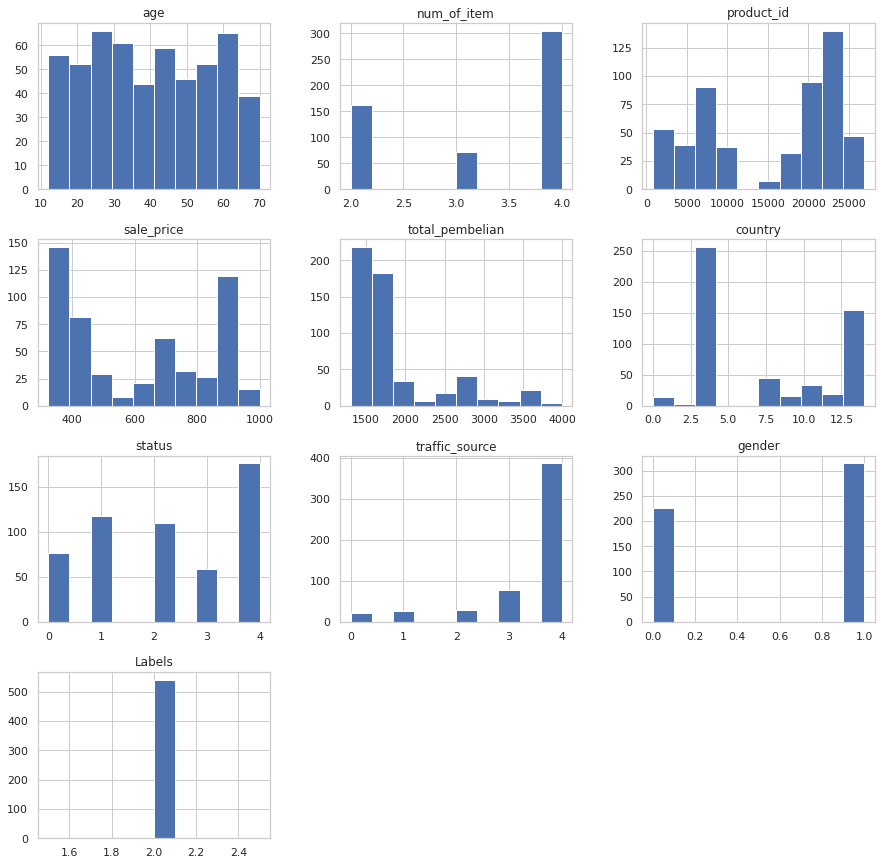

In [ ]:
results_df[results_df['Labels'] == 2].hist(figsize=(15,15));

**CLUSTER 3**

In [ ]:
summary[3]

,count,mean,std,min,25%,50%,75%,max
age,87229.0,41.069828,16.945936,12.0,26.0,41.0,56.0,70.0
num_of_item,87229.0,2.128444,1.094855,1.0,1.0,2.0,3.0,4.0
product_id,87229.0,15203.993018,8292.533154,1.0,7766.0,17091.0,21813.0,29120.0
sale_price,87229.0,88.149354,48.936664,23.0,49.0,74.0,119.0,243.0
total_pembelian,87229.0,146.319366,40.347656,94.0,111.0,138.0,176.0,244.0
country,87229.0,7.504832,4.600133,0.0,4.0,4.0,13.0,14.0
status,87229.0,2.162939,1.458727,0.0,1.0,2.0,4.0,4.0
traffic_source,87229.0,3.426292,1.060778,0.0,3.0,4.0,4.0,4.0
gender,87229.0,0.533343,0.498890,0.0,0.0,1.0,1.0,1.0
Labels,87229.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


**Cluster 3** :  Adalah kelompok yang mana kebanyakan ingin membeli/memesan barang sebanyak 1 atau 2 barang. mayoritas pada cluster 3 adalah laki-laki (1). Untuk umur pada cluster 3 ini hampir merata. Pada cluster 3, pelanggan cenderung membeli barang dengan harga 50-an. Dikarenakan pelanggan pada cluster ini hanya membeli barang 1 atau 2 dengan harga 50-an, sehingga total pembelian dari cluster 2 sebagian besar berada 100-125 dengan jumlah > 15000. 

---

Dilihat dari rentang sale_price yang dibeli serta product_id yang paling banyak dibeli pada 20000-25000, maka cluster ini cenderung tertarik untuk membeli barang dengan category "*Jeans, Shorts (DC), Pants (DC), Outwear&Coats (DC)*"

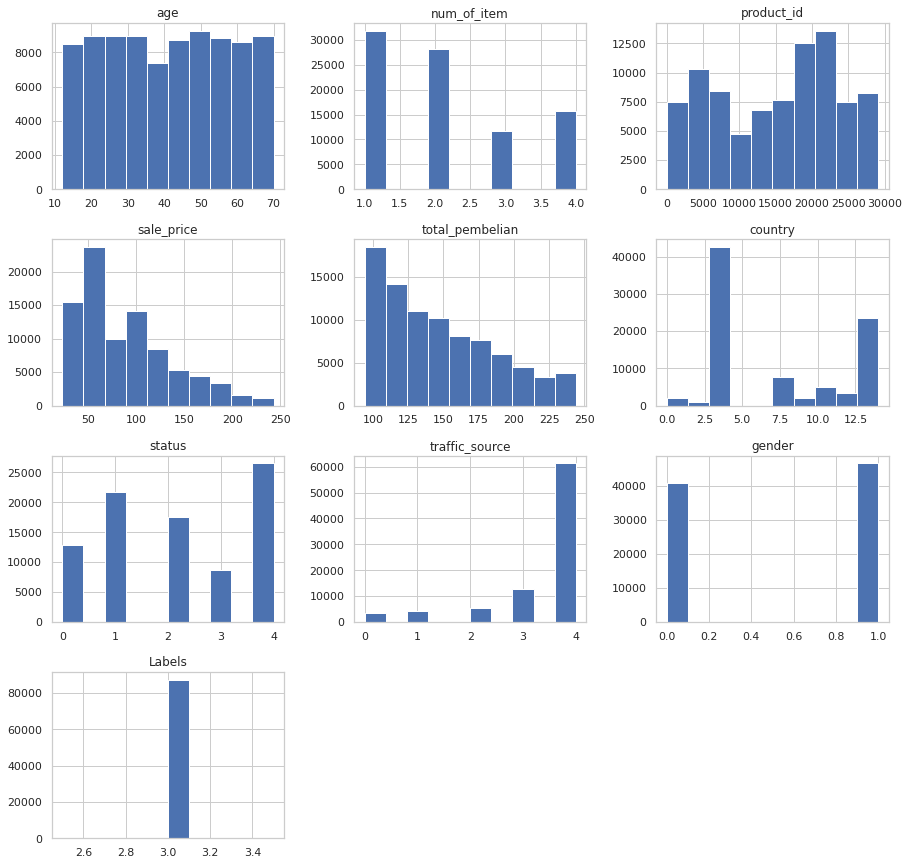

In [ ]:
results_df[results_df['Labels'] == 3].hist(figsize=(15,15));

**CLUSTER 4**

In [ ]:
summary[4]

,count,mean,std,min,25%,50%,75%,max
age,5395.0,41.360704,17.125083,12.0,27.0,41.0,57.0,70.0
num_of_item,5395.0,3.129379,1.005887,1.0,2.0,3.0,4.0,4.0
product_id,5395.0,15520.065060,8269.376854,22.0,7842.0,19797.0,21611.5,29084.0
sale_price,5395.0,282.888971,176.725687,135.0,172.0,220.0,319.0,999.0
total_pembelian,5395.0,741.348656,171.844984,542.0,599.0,693.0,820.0,1287.0
country,5395.0,7.559036,4.598204,0.0,4.0,4.0,13.0,14.0
status,5395.0,2.141427,1.446813,0.0,1.0,2.0,4.0,4.0
traffic_source,5395.0,3.435959,1.054909,0.0,3.0,4.0,4.0,4.0
gender,5395.0,0.573679,0.494587,0.0,0.0,1.0,1.0,1.0
Labels,5395.0,4.000000,0.000000,4.0,4.0,4.0,4.0,4.0


**Cluster 4** :  Adalah kelompok yang mana kebanyakan ingin membeli/memesan barang sebanyak 4 barang. mayoritas pada cluster 1 adalah laki-laki (1). Untuk umur pada cluster 4 banyak di rentang hampir merata. Pada cluster 4, pelanggan cenderung membeli barang dengan harga 100-200-an. Dikarenakan pelanggan pada cluster ini hanya membeli barang sampai 4 dengan harga 200-an, sehingga total pembelian dari cluster 2 sebagian besar berada 600-an dengan jumlah > 1500. 

---

Dilihat dari rentang sale_price yang dibeli serta product_id yang paling banyak dibeli pada 20000-25000, maka cluster ini cenderung tertarik untuk membeli barang dengan category "*Suits & Sport Coats, Outwear&Coats, Shorts, Socks , Jeans, Pants*"

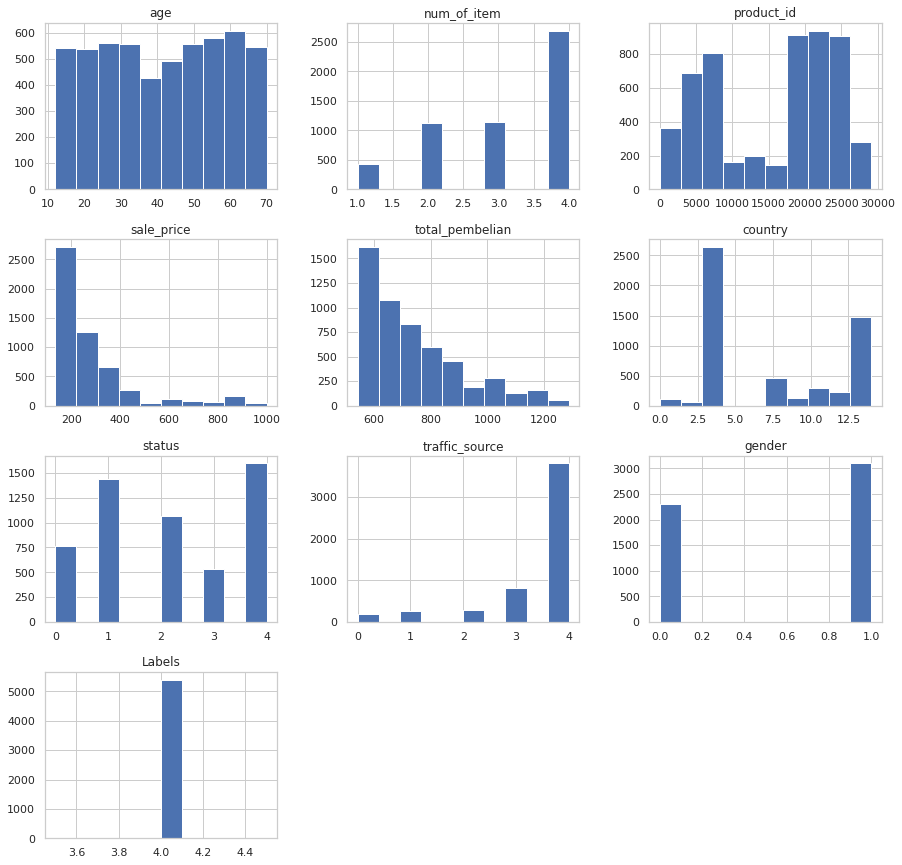

In [ ]:
results_df[results_df['Labels'] == 4].hist(figsize=(15,15));

**Untuk Menampilkan Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [ ]:
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 5)

In [ ]:
X_clusters = results_df.drop('Labels', axis=1)
y_clusters = results_df['Labels']

clf.fit(X_clusters, y_clusters)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)


**Evaluasi**

didapatkan nilai evaluasi dan didapatkan nilai akurasi sebesar 1 yang menandakan bahwa model clustering yang digunakan sudah sesuai untuk mengelompokkan beberapa variabel berdasarkan kesamaan sifat. 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = clf.predict(X_clusters)
print(classification_report(y_clusters, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    249510
           1       1.00      1.00      1.00     23913
           2       1.00      1.00      1.00       540
           3       1.00      1.00      1.00     87229
           4       1.00      1.00      1.00      5395

    accuracy                           1.00    366587
   macro avg       1.00      1.00      1.00    366587
weighted avg       1.00      1.00      1.00    366587



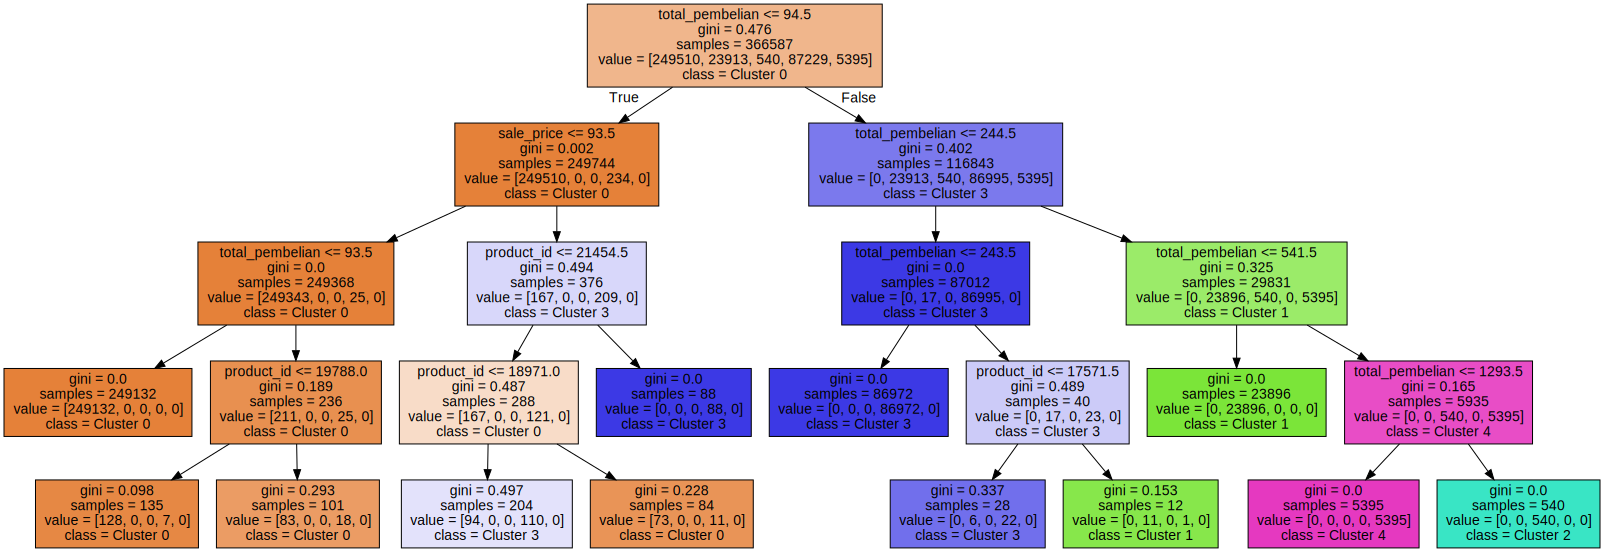

In [ ]:
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=results_df.columns[:9],  
                                class_names=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph
plt.savefig('DecisionTree.png')